<a href="https://colab.research.google.com/github/ZHAOTransparentAI/MaschinellesLernen/blob/main/Intutive_way_to_understanding_nonlinear_function__vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vanishing Gradient
Vanishing gradient refers to the scenario where the gradients become very small during backpropagation, making it difficult for the model to update its parameters effectively. This typically happens with certain activation functions like sigmoid or tanh.

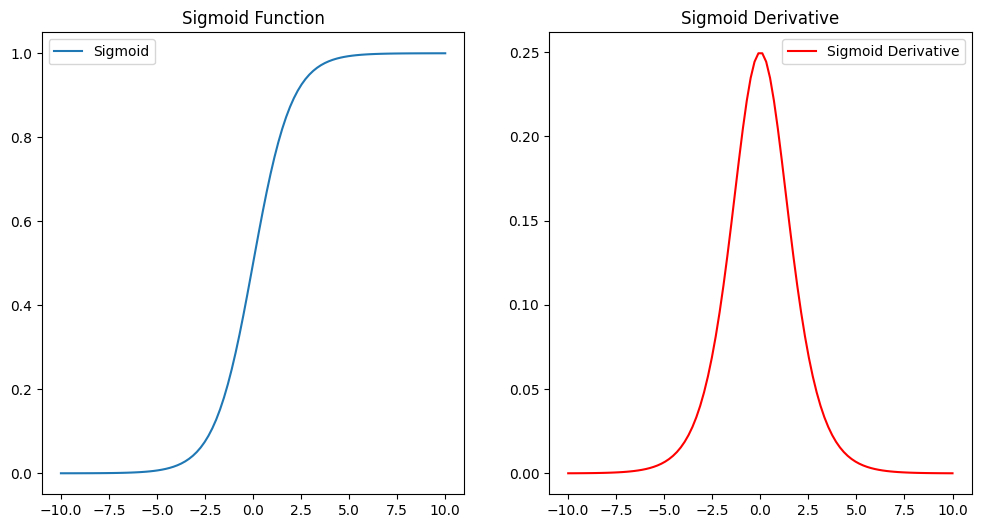

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate data
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='Sigmoid')
plt.title('Sigmoid Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='Sigmoid Derivative', color='red')
plt.title('Sigmoid Derivative')
plt.legend()

plt.show()


Why can we say that activation functions centered around 0 are beneficial?
1. Accelerating Gradient Descent Convergence
When activation functions are centered around 0, the gradients calculated during backpropagation are more evenly distributed. This helps avoid vanishing and exploding gradient problems, speeding up gradient descent convergence.

2. Avoiding Vanishing and Exploding Gradients
Activation functions centered around 0 help avoid vanishing and exploding gradients because they have higher gradient values near 0 input.

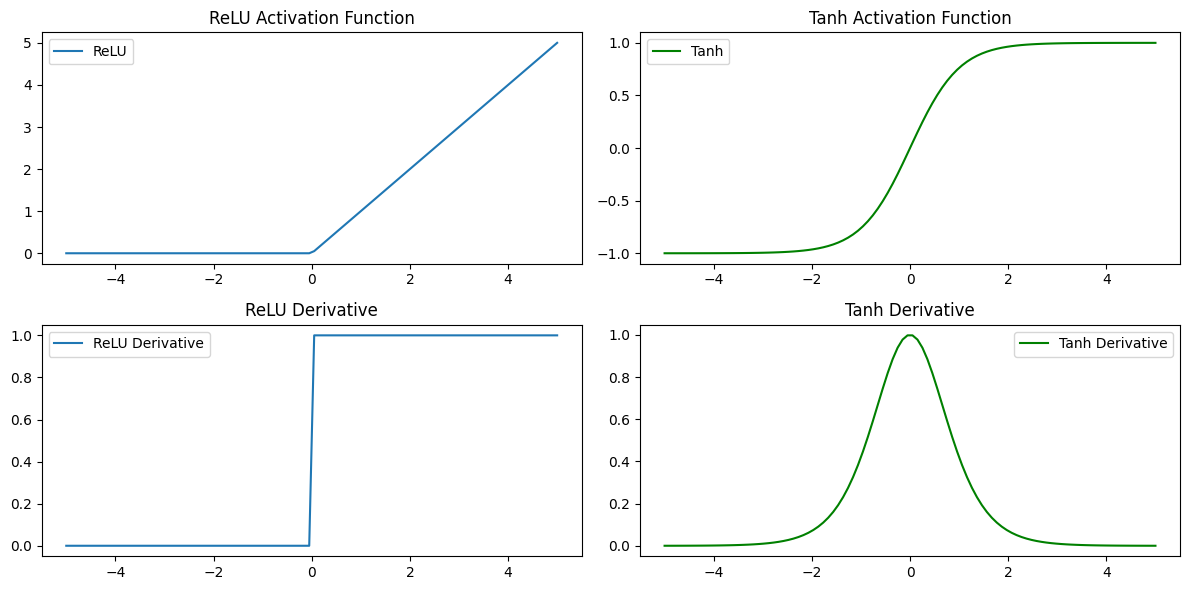

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Generate data
x = np.linspace(-5, 5, 100)

# Compute activations and their derivatives
relu_y = relu(x)
tanh_y = tanh(x)
relu_dy = relu_derivative(x)
tanh_dy = tanh_derivative(x)

# Visualize activation functions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(x, relu_y, label='ReLU')
plt.title('ReLU Activation Function')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, tanh_y, label='Tanh', color='green')
plt.title('Tanh Activation Function')
plt.legend()

# Visualize derivatives
plt.subplot(2, 2, 3)
plt.plot(x, relu_dy, label='ReLU Derivative')
plt.title('ReLU Derivative')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, tanh_dy, label='Tanh Derivative', color='green')
plt.title('Tanh Derivative')
plt.legend()

plt.tight_layout()
plt.show()


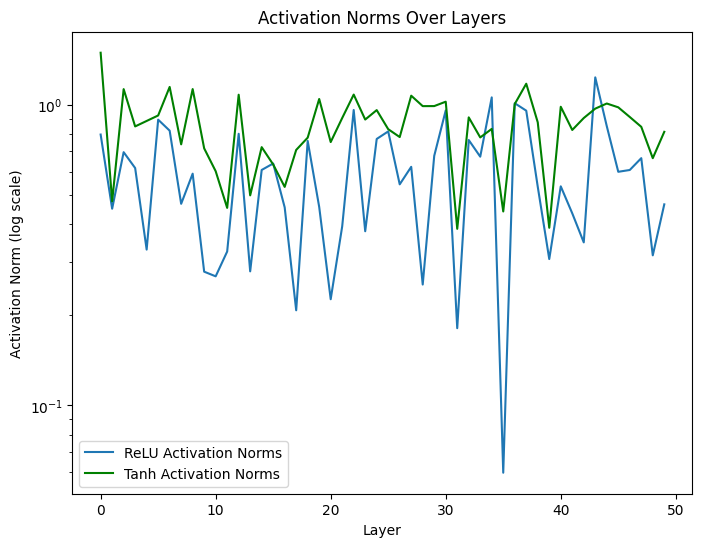

In [10]:
# Initialize parameters
np.random.seed(42)
weights_relu = np.random.randn(10, 10) * 0.1
weights_tanh = np.random.randn(10, 10) * 0.1
inputs = np.random.randn(10)

# Forward propagation
activations_relu = []
activations_tanh = []
for _ in range(50):
    inputs_relu = relu(np.dot(weights_relu, inputs))
    inputs_tanh = tanh(np.dot(weights_tanh, inputs))
    activations_relu.append(np.linalg.norm(inputs_relu))
    activations_tanh.append(np.linalg.norm(inputs_tanh))
    inputs = np.random.randn(10)  # Reset inputs for next layer

# Visualize
plt.figure(figsize=(8, 6))
plt.plot(activations_relu, label='ReLU Activation Norms')
plt.plot(activations_tanh, label='Tanh Activation Norms', color='green')
plt.yscale('log')
plt.title('Activation Norms Over Layers')
plt.xlabel('Layer')
plt.ylabel('Activation Norm (log scale)')
plt.legend()
plt.show()
